# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import operator
from collections import Counter

# Defining class for knn

- **argsort() function is used to perform an indirect sort along the given axis using the algorithm specified by the kind keyword. It returns an array of indices of the same shape as arr that that would sort the array.**
-**The word 'self' is used to represent the instance of a class. By using the "self" keyword we access the attributes and methods of the class in python.**
- **"__init__" is a reseved method in python classes. It is called as a constructor in object oriented terminology. This method is called when an object is created from a class and it allows the class to initialize the attributes of the class.**

In [ ]:
class K_Nearest_Neigbors():
  def __init__(self,k):
    self.k=k

  def fit(self,x_train,y_train):
    self.x_train=x_train
    self.y_train=y_train
    self.m, self.n=x_train.shape

  def predict(self,x_test):
   self.x_test=x_test
   self.m_test, self.n=x_test.shape
   y_predict=np.zeros(self.m_test)
   for i in range(self.m_test):
     x=self.x_test[i]
     neigh=np.zeros(self.k)
     neigh=self.find_neighbors(x)
     y_predict[i]=np.mean(neigh) 
   return y_predict

  def find_neighbors(self,x):
    euclidean_distance=np.zeros(self.m)
    for i in range(self.m):
      d=self.euclidean(x,self.x_train[i])
      euclidean_distance[i]=d
    inds=euclidean_distance.argsort()
    y_train_sorted=self.y_train[inds]
    return y_train_sorted[:self.k]

  def euclidean(self,x,x_train):
    return np.sqrt(np.sum(np.square(x-x_train)))

# Using the made knn regressor to predict

----> Predicted values by our model:  
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]

----> Predicted values by sklearn model : 
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 0]

----> Confusion Matrix for the prediction which we made
[[77  2]
 [18 23]]

----> Confusion Matrix for the prediction made by sklearn
[[77  2]
 [18 23]]

----> Heat map for our Prediction:-
Predicted  0.0  1.0
Actual             
0           77    2
1           18   23


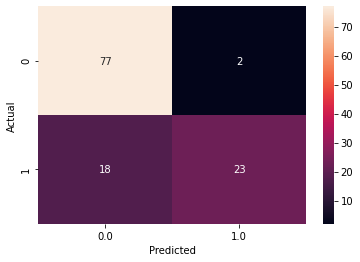


----> Heat map for prediction made by sklearn:-
Predicted   0   1
Actual           
0          77   2
1          18  23


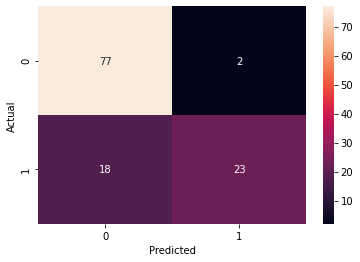


----> Classification Report for our Prediction:-

              precision    recall  f1-score   support

           0       0.81      0.97      0.89        79
           1       0.92      0.56      0.70        41

    accuracy                           0.83       120
   macro avg       0.87      0.77      0.79       120
weighted avg       0.85      0.83      0.82       120


----> Classification Report for prediction made by sklearn:-

              precision    recall  f1-score   support

           0       0.81      0.97      0.89        79
           1       0.92      0.56      0.70        41

    accuracy                           0.83       120
   macro avg       0.87      0.77      0.79       120
weighted avg       0.85      0.83      0.82       120




In [ ]:
def main():
  dataset=pd.read_csv('/content/drive/MyDrive/ML Tasks/ML learning/Social_Network_Ads.csv')
  x=dataset.iloc[:, 2:4].values
  y=dataset.iloc[:, -1].values

  from sklearn.model_selection import train_test_split
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

  knn=K_Nearest_Neigbors(k=37)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)

  from sklearn.neighbors import KNeighborsClassifier
  knn1=KNeighborsClassifier(n_neighbors=37)
  knn1.fit(x_train,y_train)
  y_pred1=knn1.predict(x_test)

  z=np.round(y_pred)
  print("----> Predicted values by our model:  ")
  print(z) 
  print('')

  z1=np.round(y_pred1)
  print("----> Predicted values by sklearn model : ")
  print(z1)
  print('')

  from sklearn.metrics import accuracy_score,confusion_matrix
  cm=confusion_matrix(y_test,z)
  print('----> Confusion Matrix for the prediction which we made')
  print(cm)
  print('')

  cm1=confusion_matrix(y_test,z1)
  print('----> Confusion Matrix for the prediction made by sklearn')
  print(cm1)
  print('')

  import seaborn as sn
  print('----> Heat map for our Prediction:-')
  confusion_matrix=pd.crosstab(y_test,z,rownames=['Actual'],colnames=['Predicted'])
  print(confusion_matrix)
  sn.heatmap(confusion_matrix,annot=True)
  plt.show()
  print('')

  print('----> Heat map for prediction made by sklearn:-')
  confusion_matrix=pd.crosstab(y_test,z1,rownames=['Actual'],colnames=['Predicted'])
  print(confusion_matrix)
  sn.heatmap(confusion_matrix,annot=True)
  plt.show()
  print('')

  print('----> Classification Report for our Prediction:-')
  print('')
  from sklearn.metrics import classification_report
  print(classification_report(y_test,z))
  print('')

  print('----> Classification Report for prediction made by sklearn:-')
  print('')
  from sklearn.metrics import classification_report
  print(classification_report(y_test,z1))
  print('')

if __name__=="__main__":
 main()